# **Desafio 05 | SONDA**

## **1. Definição do Problema de Negócio**

### **1.1 Sobre a SONDA**

A SONDA é a principal rede latino-americana de serviços de TI. Em seus quase 45 anos de história na região, caracterizou-se por contar com uma oferta integral de serviços e soluções de TI, uma visão de aliado tecnológico para abordar projetos e uma sólida posição financeira, prestando de forma consistente serviços e soluções alinhadas com as estratégias de negócio de seus clientes.

Desde 1974, a missão é agregar valor às atividades e negócios dos clientes e impulsionar o crescimento através de uma melhor utilização das tecnologias da informação, construindo relações de longo prazo que se traduzem em uma proximidade com seu trabalho e evolução.

### **1.2 Objetivo do Desafio**

O desafio consiste em um problema comum na área de Ciência de Dados. Um cliente expõe um problema específico de sua área e através da sua análiise encontrar uma possível solução. Um cliente da área de Telecomunicações reportou problema de perde de clientes (churn) e gostaria de identificar essa possível perda antes que ela ocorra.

O desafiio consiste de implementar um algoritmo de Machine Learning para classificação binária, capaz de identificar se um cliente será perdido ou não.

## **2. Importação dos Dados e Pacotes**

### **2.1 Importação dos Pacotes**

In [383]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### **2.2 Importação dos Dados**

**Dicionário dos Dados**

| Coluna           | Descrição                                                                                                          |
| ---------------- | ------------------------------------------------------------------------------------------------------------------ |
| ID               | ID do Cliente                                                                                                      |
| GENDER           | Whether the customer is a male or a female                                                                         |
| SENIORCITIZEN    | Whether the customer is a senior citizen or not (1, 0)                                                             |
| PARTNER          | Whether the customer has a partner or not (Yes, No)                                                                |
| DEPENDENTS       | Whether the customer has dependents or not (Yes, No)                                                               |
| TENURE           | Number of months the customer has stayed with the company                                                          |
| PHONESERVICE     | Whether the customer has a phone service or not (Yes, No)                                                          |
| MULTIPLELINES    | Whether the customer has multiple lines or not (Yes, No, No phone service)                                         |
| INTERNETSERVICE  | Customer’s internet service provider (DSL, Fiber optic, No)                                                        |
| ONLINESECURITY   | Whether the customer has online security or not (Yes, No, No internet service)                                     |
| ONLINEBACKUP     | Whether the customer has online backup or not (Yes, No, No internet service)                                       |
| DEVICEPROTECTION | Whether the customer has device protection or not (Yes, No, No internet service)                                   |
| TECHSUPPORT      | Whether the customer has tech support or not (Yes, No, No internet service)                                        |
| STREAMINGTV      | Whether the customer has streaming TV or not (Yes, No, No internet service)                                        |
| STREAMINGMOVIES  | Whether the customer has streaming movies or not (Yes, No, No internet service)                                    |
| CONTRACT         | The contract term of the customer (Month-to-month, One year, Two year)                                             |
| PAPERLESSBILLING | Whether the customer has paperless billing or not (Yes, No)                                                        |
| PAYMENTMETHOD    | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MONTHLYCHARGES   | The amount charged to the customer monthly                                                                         |
| TOTALCHARGES     | The total amount charged to the customer                                                                           |
| CHURN            | Whether the customer churned or not (Yes or No)                                                                    |

In [384]:
df = pd.read_csv('data/dataset.csv')
answers = pd.read_csv('data/ANSWERS.csv')
answer_modify = answers.copy()

df = df.drop('ID', axis = 1)

## **3. Análise Exploratória**

In [385]:
print('O dataset possui {} linhas e {} colunas.'.format(*df.shape))
df.head()

O dataset possui 4548 linhas e 20 colunas.


,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,Female,0.0,No,No,26.0,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),131.55,1483.7,No
1,Male,0.0,No,No,39.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),79.61,2737.31,No
2,Male,0.0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),9.26,9.26,No
3,Male,0.0,Yes,Yes,66.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),42.14,1689.19,No
4,Male,0.0,No,No,56.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,126.24,5608.69,No


Verificando as informações com o ```.info()``` podemos notar que existem alguns valores que estão sendo representados como float64 e são object ou int (```SENIORCITIZEN```) e outros valores representados como object que são float64 (```TOTALCHARGES```).

Como alguns valores são categóricos, vamos realizar a representação através de números posteriormente, o que transformará as variáveis em int.

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GENDER            4520 non-null   object 
 1   SENIORCITIZEN     4523 non-null   float64
 2   PARTNER           4524 non-null   object 
 3   DEPENDENTS        4526 non-null   object 
 4   TENURE            4533 non-null   float64
 5   PHONESERVICE      4520 non-null   object 
 6   MULTIPLELINES     4523 non-null   object 
 7   INTERNETSERVICE   4524 non-null   object 
 8   ONLINESECURITY    4518 non-null   object 
 9   ONLINEBACKUP      4518 non-null   object 
 10  DEVICEPROTECTION  4524 non-null   object 
 11  TECHSUPPORT       4530 non-null   object 
 12  STREAMINGTV       4523 non-null   object 
 13  STREAMINGMOVIES   4523 non-null   object 
 14  CONTRACT          4525 non-null   object 
 15  PAPERLESSBILLING  4517 non-null   object 
 16  PAYMENTMETHOD     4520 non-null   object 


In [387]:
df.describe()

,SENIORCITIZEN,TENURE,MONTHLYCHARGES
count,4523.000000,4533.000000,4527.000000
mean,0.163608,31.812927,95.836351
std,0.369961,24.419055,75.492469
min,0.000000,0.000000,0.090000
25%,0.000000,8.000000,34.645000
50%,0.000000,28.000000,73.530000
75%,0.000000,54.000000,143.595000
max,1.000000,72.000000,345.240000


In [388]:
df.describe(include='O')

,GENDER,PARTNER,DEPENDENTS,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,TOTALCHARGES,CHURN
count,4520,4524,4526,4520,4523,4524,4518,4518,4524,4530,4523,4523,4525,4517,4520,4527,4548
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,4495,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,,No
freq,2271,2319,3183,4110,2218,1996,2258,2009,1985,2240,1795,1776,2545,2699,1531,3,3337


Abaixo, podemos verificar que apenas as colunas ```TENURE```, ```MONTHLYCHARGES``` e ```TOTALCHARGES``` são variáveis que não representam uma categoria, pois possuem uma alta quantidade de valores únicos.

In [389]:
for column in df.columns :
    print(f' {column} - {df.dtypes[column]} \n {df[column].nunique()} valores únicos \n {df[column].unique()[:20]} \n')

 GENDER - object 
 2 valores únicos 
 ['Female' 'Male' nan] 

 SENIORCITIZEN - float64 
 2 valores únicos 
 [ 0.  1. nan] 

 PARTNER - object 
 2 valores únicos 
 ['No' 'Yes' nan] 

 DEPENDENTS - object 
 2 valores únicos 
 ['No' 'Yes' nan] 

 TENURE - float64 
 73 valores únicos 
 [26. 39.  1. 66. 56.  3. 14. 72. 28. 54.  4. 22. 16. 42. 35. 51. 46. 25.
 23.  2.] 

 PHONESERVICE - object 
 2 valores únicos 
 ['Yes' 'No' nan] 

 MULTIPLELINES - object 
 3 valores únicos 
 ['No' 'Yes' 'No phone service' nan] 

 INTERNETSERVICE - object 
 3 valores únicos 
 ['DSL' 'Fiber optic' 'No' nan] 

 ONLINESECURITY - object 
 3 valores únicos 
 ['No' 'No internet service' 'Yes' nan] 

 ONLINEBACKUP - object 
 3 valores únicos 
 ['Yes' 'No' 'No internet service' nan] 

 DEVICEPROTECTION - object 
 3 valores únicos 
 ['Yes' 'No' 'No internet service' nan] 

 TECHSUPPORT - object 
 3 valores únicos 
 ['No' 'No internet service' 'Yes' nan] 

 STREAMINGTV - object 
 3 valores únicos 
 ['No' 'No internet

In [390]:
num_features = list(df.nunique()[df.nunique() > 4].index)
cat_features = list(df.nunique()[df.nunique() <= 4].index)

print(f'Colunas Categóricas : {cat_features}\n \nColunas Numéricas : {num_features}')

Colunas Categóricas : ['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV', 'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD', 'CHURN']
 
Colunas Numéricas : ['TENURE', 'MONTHLYCHARGES', 'TOTALCHARGES']


In [391]:
# Verificado que TOTALCHARGES possui strings vazias " " que impossibilitam a transformação em variável do tipo numérica.
df['TOTALCHARGES'] = df['TOTALCHARGES'].map(lambda value : np.nan if value == " " else value)
df['TOTALCHARGES'] = df['TOTALCHARGES'].astype('float64')
df['TOTALCHARGES'].dtype

dtype('float64')

Abaixo, podemos verificar a quantidade de valores nulos para as variáveis, onde posteriormente iremos decidir como tratar essa informação, através de remoções ou inputações de valores para o preenchimento nos campos nulos.

Mas a fim de facilitar a exploração dos dados nessa primeira parte, vamos realizar a alteração dos valores NaN para No_Informed (variáveis do tipo object / categorias) e para -1 (variáveis numéricas).

In [392]:
# Quantidade de valores nulos por variável
df.isna().sum(axis=0).sort_values(ascending=False)

PAPERLESSBILLING    31
ONLINESECURITY      30
ONLINEBACKUP        30
GENDER              28
PAYMENTMETHOD       28
PHONESERVICE        28
STREAMINGTV         25
MULTIPLELINES       25
STREAMINGMOVIES     25
SENIORCITIZEN       25
TOTALCHARGES        24
DEVICEPROTECTION    24
INTERNETSERVICE     24
PARTNER             24
CONTRACT            23
DEPENDENTS          22
MONTHLYCHARGES      21
TECHSUPPORT         18
TENURE              15
CHURN                0
dtype: int64

In [393]:
# O máximo de valores nulos por linha são 2.
df.isna().sum(axis = 1).sort_values(ascending=False)

2562    2
3971    2
3987    2
1136    2
4433    2
       ..
1593    0
1595    0
1596    0
1597    0
4547    0
Length: 4548, dtype: int64

In [394]:
# Total
len(df[df.isna().any(axis=1)])

445

In [395]:
# Após alteração podemos verificar que não temos mais nenhum valor nulo.
df[cat_features] = df[cat_features].fillna('Not_Informed')
df[num_features] = df[num_features].fillna(-1)
len(df[df.isna().any(axis=1)])

0

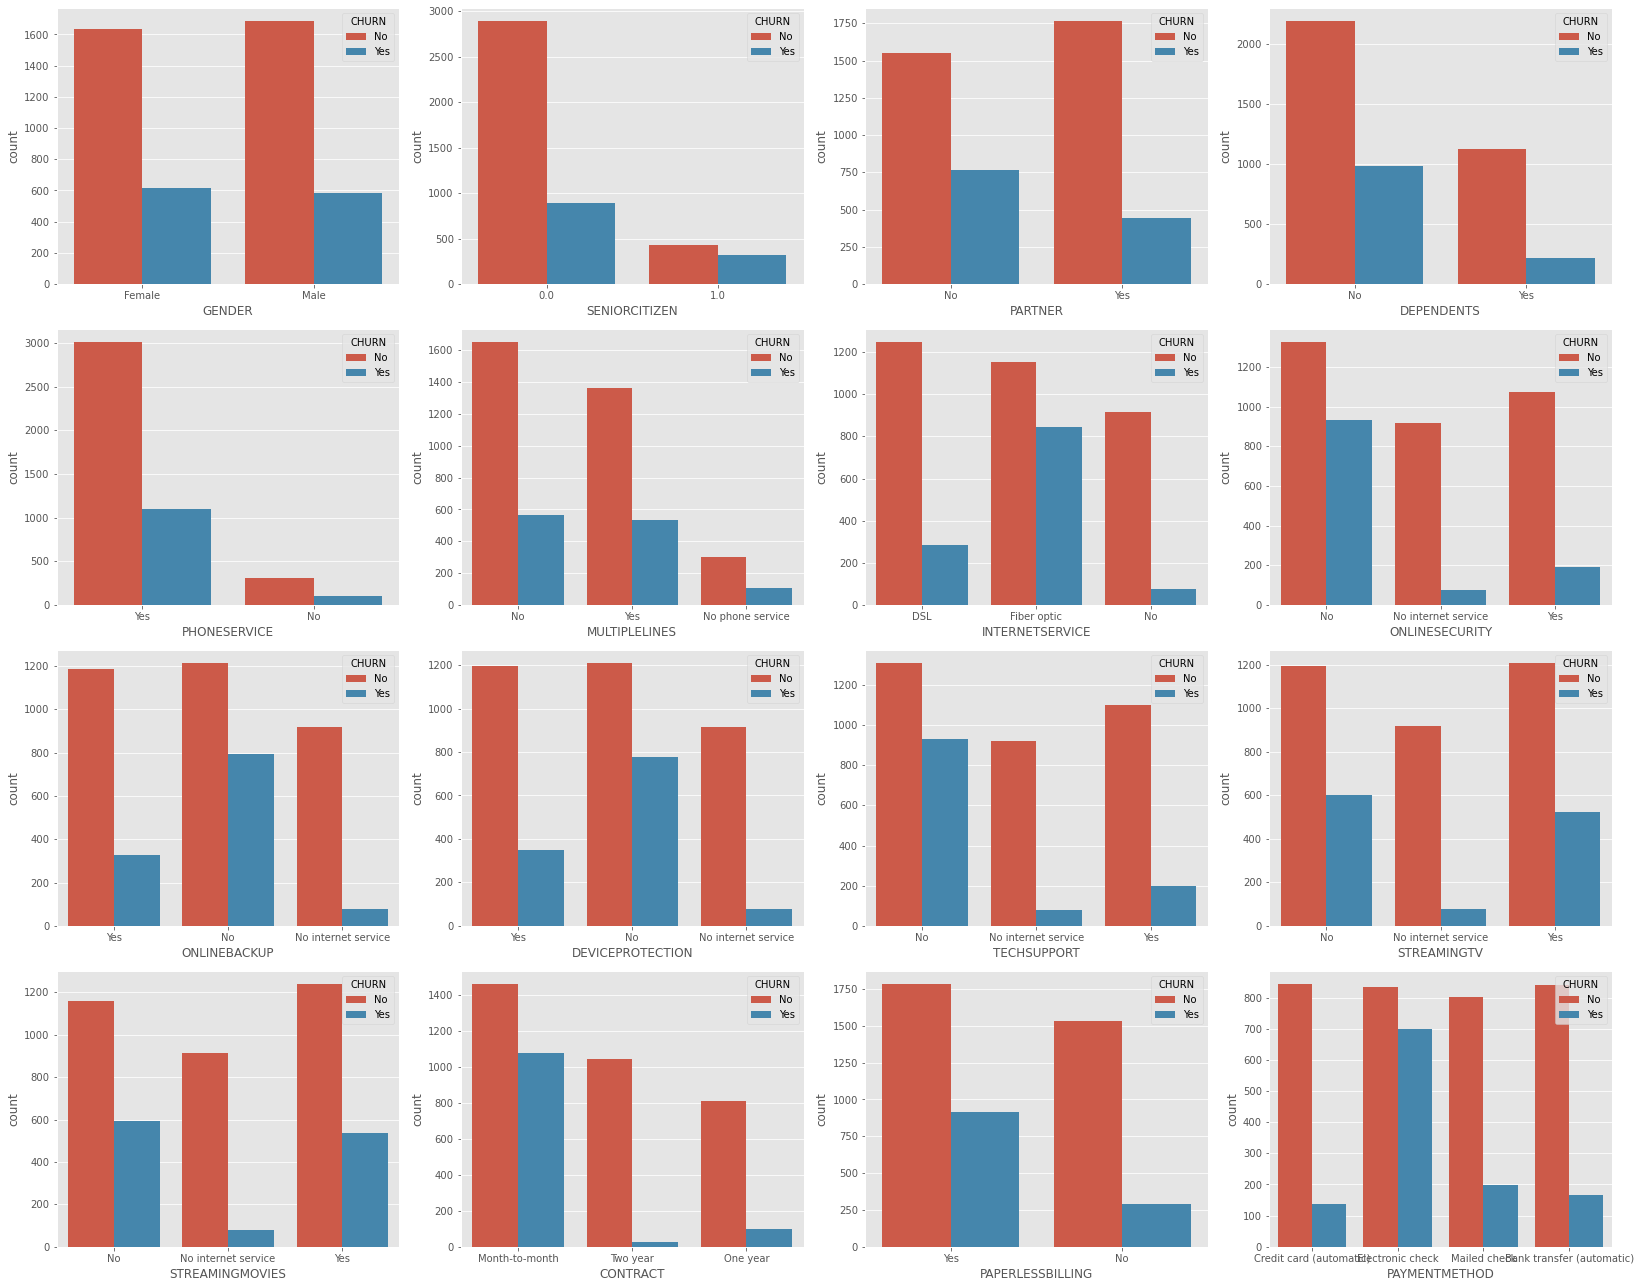

In [396]:
fig, axes = plt.subplots(4, 4, figsize=(23,18))
ax_row, ax_col = 0, 0

for column in df[cat_features].columns[:-1] :
    sns.countplot(data = df.query(f'{column} != "Not_Informed"'), x = column, ax = axes[ax_row, ax_col], hue = df['CHURN'])
    
    ax_col += 1
    if ax_col > 3 :
        ax_col = 0
        ax_row += 1

fig.tight_layout()

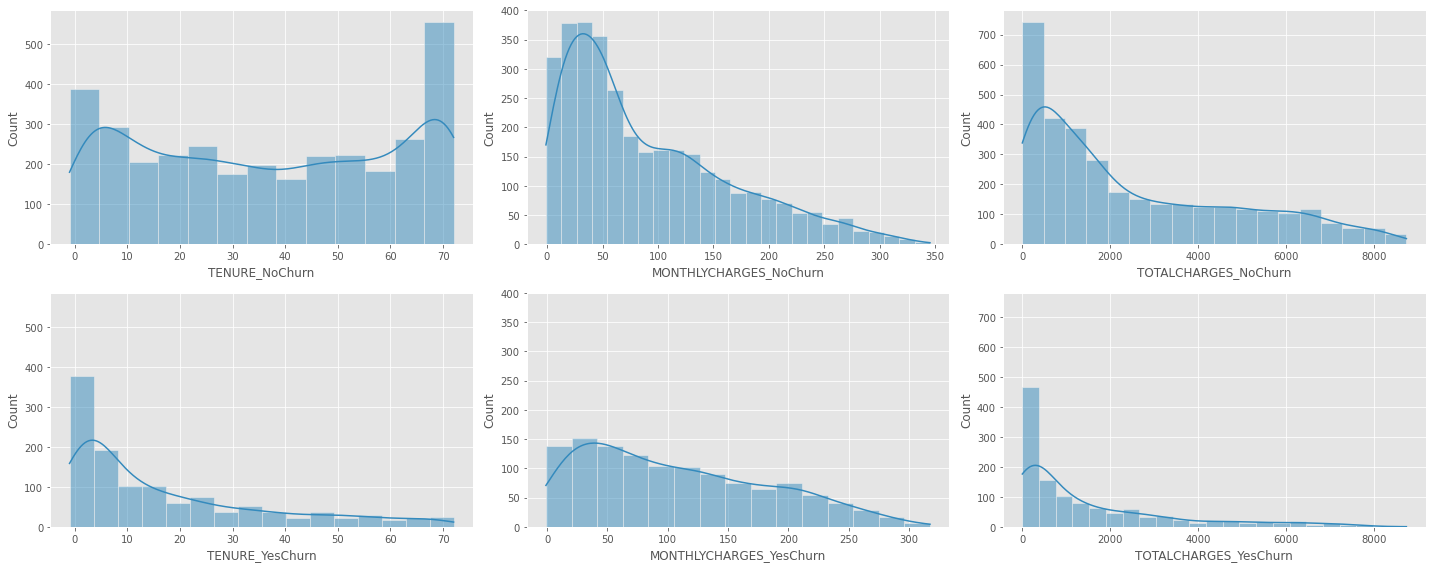

In [397]:
fig, axes = plt.subplots(2,3 , figsize=(20,8), sharey='col')
ax_col = 0

for column in df[num_features].columns :
    sns.histplot(x = df.query('CHURN == "No"')[column], ax = axes[0, ax_col], kde=True)
    axes[0, ax_col].set_xlabel(f'{column}_NoChurn')
    ax_col += 1

ax_col = 0
for column in df[num_features].columns :
    sns.histplot(x = df.query('CHURN == "Yes"')[column], ax = axes[1, ax_col], kde=True)
    axes[1, ax_col].set_xlabel(f'{column}_YesChurn')
    ax_col += 1

fig.tight_layout()

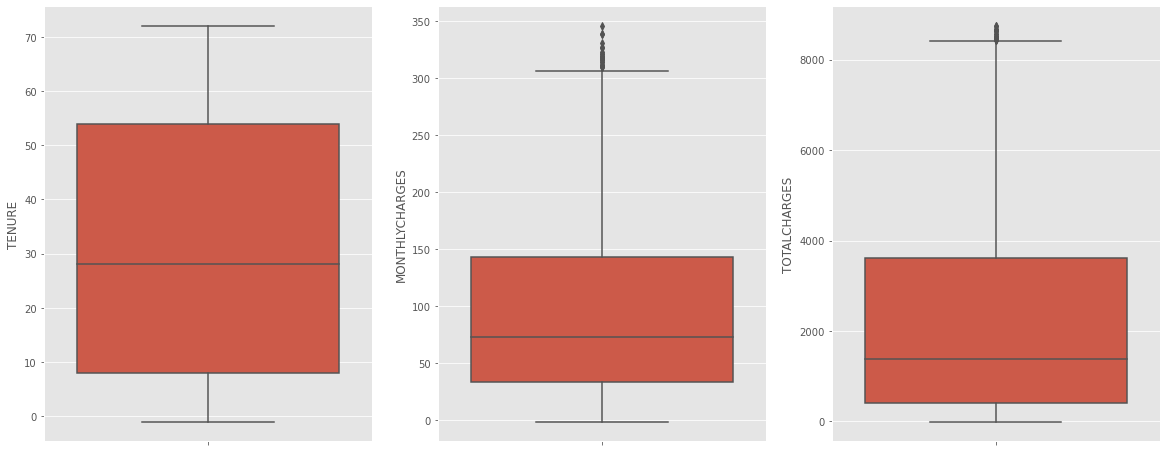

In [398]:
fig, axes = plt.subplots(1,3 , figsize=(20,8))
ax_col = 0

for column in df[num_features].columns :
    sns.boxplot(y = df[column], ax = axes[ax_col])
    ax_col += 1

Conseguimos também verificar uma desproporção para os valores da variável target (o que queremos prever) ```CHURN```, onde o nosso dataset possui mais valores "No" (não ocorreu churn) do que "Yes" (ocorreu churn).

Podemos aplicar algumas técnicas como downsampling

A coluna target CHURN possui 3337 valores 'No' e 1211 'Yes'.


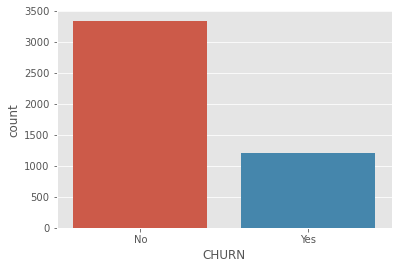

In [399]:
print(f"A coluna target CHURN possui {df['CHURN'].value_counts()['No']} valores 'No' e {df['CHURN'].value_counts()['Yes']} 'Yes'.")
sns.countplot(data = df, x = 'CHURN')
plt.show()

In [400]:
df['CHURN'].value_counts(normalize=True)

No     0.733729
Yes    0.266271
Name: CHURN, dtype: float64

## **4. Pré-Processamento**

In [401]:
# Realizar o drop das linhas que estão com valor de -1 (ausência) para as variáveis NUMÉRICAS -> 60 valores
df = df.drop(df[(df[num_features] == -1).any(axis=1)].index)
df

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,Female,0.0,No,No,26.0,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),131.55,1483.70,No
1,Male,0.0,No,No,39.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),79.61,2737.31,No
2,Male,0.0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),9.26,9.26,No
3,Male,0.0,Yes,Yes,66.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),42.14,1689.19,No
4,Male,0.0,No,No,56.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,126.24,5608.69,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,Male,0.0,No,No,3.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Not_Informed,Mailed check,25.14,121.39,No
4544,Male,0.0,No,No,7.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,200.74,647.14,Yes
4545,Male,0.0,No,No,18.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),46.47,1500.07,No
4546,Female,0.0,Yes,Yes,55.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),13.07,1375.42,No


In [402]:
df = df.replace('No internet service', 'No')
df = df.replace('No phone service', 'No')

In [403]:
df = df.drop(df[(df == 'Not_Informed').any(axis=1)].index).reset_index().drop('index', axis = 1)

In [404]:
df['GENDER'] = df['GENDER'].map(lambda x : 1 if x == 'Female' else 0)
df['SENIORCITIZEN'] = df['SENIORCITIZEN'].astype('int64')
df

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,1,0,No,No,26.0,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),131.55,1483.70,No
1,0,0,No,No,39.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),79.61,2737.31,No
2,0,0,No,No,1.0,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),9.26,9.26,No
3,0,0,Yes,Yes,66.0,Yes,Yes,No,No,No,No,No,No,No,Two year,Yes,Credit card (automatic),42.14,1689.19,No
4,0,0,No,No,56.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,126.24,5608.69,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,1,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),159.98,7190.78,No
4099,0,0,No,No,7.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,200.74,647.14,Yes
4100,0,0,No,No,18.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),46.47,1500.07,No
4101,1,0,Yes,Yes,55.0,Yes,Yes,No,No,No,No,No,No,No,Two year,Yes,Credit card (automatic),13.07,1375.42,No


In [405]:
df['CHURN'] = df['CHURN'].map(lambda x : 1 if x == 'Yes' else 0)
df['CHURN'].head()

0    0
1    0
2    0
3    0
4    0
Name: CHURN, dtype: int64

In [406]:
ohe_columns = ['INTERNETSERVICE', 'CONTRACT', 'PAYMENTMETHOD']
df = pd.get_dummies(data=df, columns=ohe_columns)
df.dtypes

GENDER                                       int64
SENIORCITIZEN                                int64
PARTNER                                     object
DEPENDENTS                                  object
TENURE                                     float64
PHONESERVICE                                object
MULTIPLELINES                               object
ONLINESECURITY                              object
ONLINEBACKUP                                object
DEVICEPROTECTION                            object
TECHSUPPORT                                 object
STREAMINGTV                                 object
STREAMINGMOVIES                             object
PAPERLESSBILLING                            object
MONTHLYCHARGES                             float64
TOTALCHARGES                               float64
CHURN                                        int64
INTERNETSERVICE_DSL                          uint8
INTERNETSERVICE_Fiber optic                  uint8
INTERNETSERVICE_No             

In [408]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])
df[num_features].head()

,TENURE,MONTHLYCHARGES,TOTALCHARGES
0,0.352113,0.380878,0.169749
1,0.535211,0.230393,0.313190
2,0.000000,0.026568,0.001040
3,0.915493,0.121831,0.193262
4,0.774648,0.365493,0.641741


In [409]:
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,...,INTERNETSERVICE_DSL,INTERNETSERVICE_Fiber optic,INTERNETSERVICE_No,CONTRACT_Month-to-month,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Bank transfer (automatic),PAYMENTMETHOD_Credit card (automatic),PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check
0,1,0,No,No,0.352113,Yes,No,No,Yes,Yes,...,1,0,0,1,0,0,0,1,0,0
1,0,0,No,No,0.535211,Yes,Yes,No,No,No,...,0,1,0,1,0,0,0,1,0,0
2,0,0,No,No,0.000000,Yes,No,No,No,No,...,0,0,1,1,0,0,0,1,0,0
3,0,0,Yes,Yes,0.915493,Yes,Yes,No,No,No,...,0,0,1,0,0,1,0,1,0,0
4,0,0,No,No,0.774648,Yes,Yes,No,Yes,No,...,0,1,0,1,0,0,0,0,1,0


In [419]:
for col in df.dtypes[df.dtypes == 'object'].index :
    print(f'{col} : {df[col].unique()}')

PARTNER : ['No' 'Yes']
DEPENDENTS : ['No' 'Yes']
PHONESERVICE : ['Yes' 'No']
MULTIPLELINES : ['No' 'Yes']
ONLINESECURITY : ['No' 'Yes']
ONLINEBACKUP : ['Yes' 'No']
DEVICEPROTECTION : ['Yes' 'No']
TECHSUPPORT : ['No' 'Yes']
STREAMINGTV : ['No' 'Yes']
STREAMINGMOVIES : ['No' 'Yes']
PAPERLESSBILLING : ['Yes' 'No']


In [422]:
two_cat = df.dtypes[df.dtypes == 'object'].index
df[two_cat] = df[two_cat].replace({"No" : 0, "Yes" : 1})
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,...,INTERNETSERVICE_DSL,INTERNETSERVICE_Fiber optic,INTERNETSERVICE_No,CONTRACT_Month-to-month,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Bank transfer (automatic),PAYMENTMETHOD_Credit card (automatic),PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check
0,1,0,0,0,0.352113,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0.535211,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,0,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,0,0,1,1,0.915493,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0,0,0,0,0.774648,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


<AxesSubplot:>

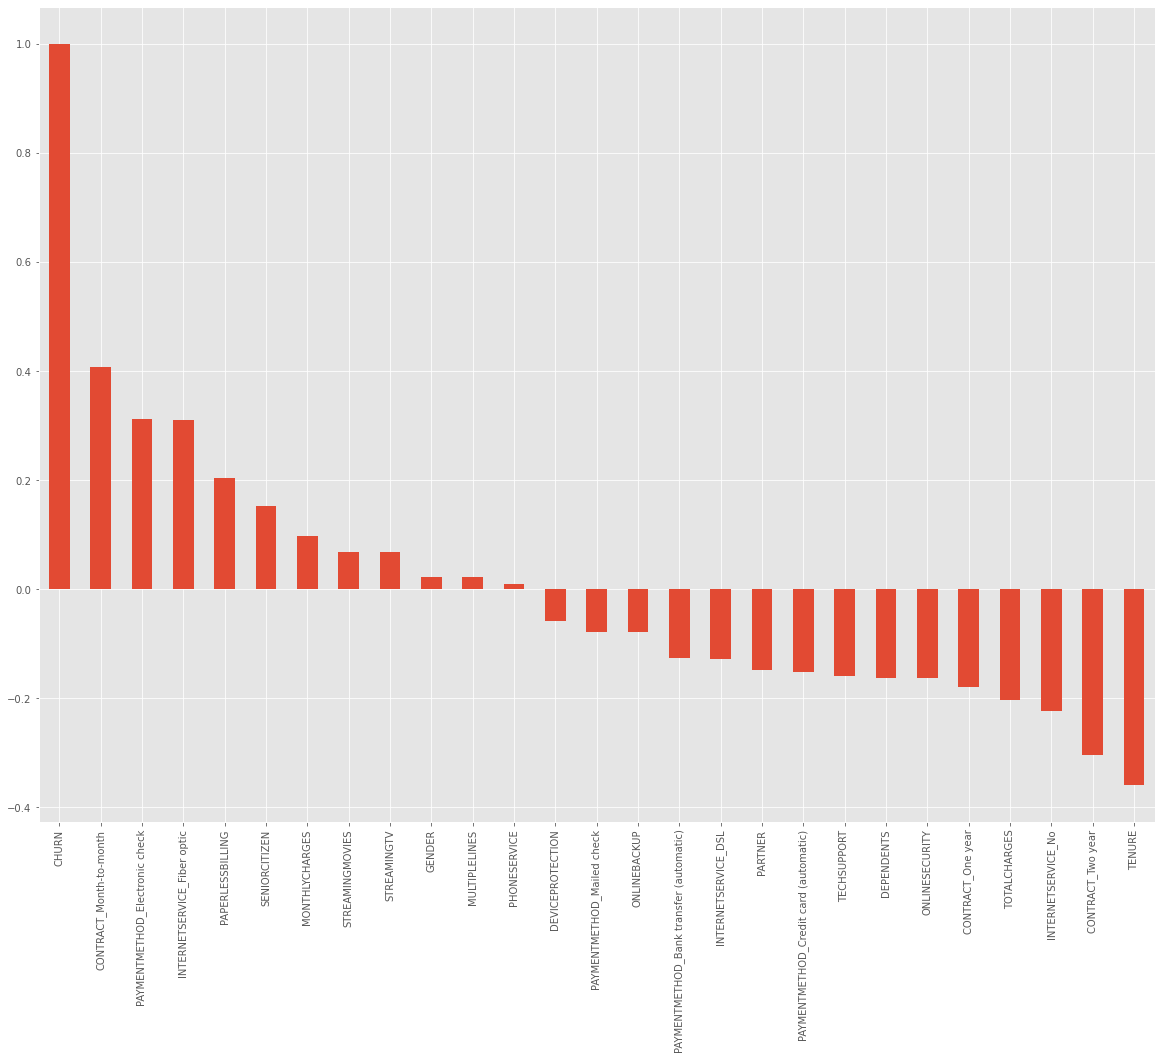

In [424]:
fig, ax = plt.subplots(figsize=(20,15))
df.corr()['CHURN'].sort_values(ascending=False).plot(kind='bar')

## **5. Criação do Modelo de Machine Learning**

In [460]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [426]:
def roda_modelo(mdl, X, y) :
    """"
    :param mdl : Tupla de modelos contendo nome e instância do modelo
    :X : Variáveis Independentes / Previsoras
    :y : Variável Dependente / Target
    """
    resultados_dataframe = pd.DataFrame(columns = ['Modelo', 'Accuracy_Train', 'F1-score_train', 'Recall_train', 'Precision_train', 'Accuracy_Test', 'F1-score_test', 'Recall_test', 'Precision_test'])
    
    for name, model in mdl :
        np.random.seed(42)
        # print(f'------------{name}-----------')
        acc_results_test = []
        f1_results_test = []
        recall_results_test = []
        precision_results_test = []
        
        acc_results_train = []
        f1_results_train = []
        recall_results_train = []
        precision_results_train = []
        
        rkf = RepeatedKFold(n_splits = 2, n_repeats = 10, random_state = 42)
        
        for linhas_train, linhas_test in rkf.split(X) :
    
            X_train, X_test = X.iloc[linhas_train], X.iloc[linhas_test]
            y_train, y_test = y.iloc[linhas_train], y.iloc[linhas_test]
            
            modelo = model
            modelo.fit(X_train, y_train)
            
            pred_train = modelo.predict(X_train)
            acc_train = accuracy_score(y_train, pred_train)
            f1_train = f1_score(y_train, pred_train)
            recall_train = recall_score(y_train, pred_train)
            precision_train = precision_score(y_train, pred_train)
            
            acc_results_train.append(acc_train)
            f1_results_train.append(f1_train)
            recall_results_train.append(recall_train)
            precision_results_train.append(precision_train)
            
            pred_test = modelo.predict(X_test)
            acc_test = accuracy_score(y_test, pred_test)
            f1_test = f1_score(y_test, pred_test)
            recall_test = f1_score(y_test, pred_test)
            precision_test = precision_score(y_test, pred_test)
            
            acc_results_test.append(acc_test)
            f1_results_test.append(f1_test)
            recall_results_test.append(recall_test)
            precision_results_test.append(precision_test)
            
            #print(f'Acc : {acc}\nF1_score : {f1}')
            #print()
        
        accuracy_test = np.mean(acc_results_test)
        f1_Score_test = np.mean(f1_results_test)
        recall_test = np.mean(recall_results_test)
        precision_test = np.mean(precision_results_test)
        
        accuracy_train = np.mean(acc_results_train)
        f1_Score_train = np.mean(f1_results_train)
        recall_train = np.mean(recall_results_train)
        precision_train = np.mean(precision_results_train)
        
        resultados_dataframe = resultados_dataframe.append({'Modelo' : name, 'Accuracy_Train' : accuracy_train, 'F1-score_train' : f1_Score_train, 'Recall_train' : recall_train, 'Precision_train' : precision_train, 
                                                            'Accuracy_Test' : accuracy_test, 'F1-score_test' : f1_Score_test, 'Recall_test' : recall_test, 'Precision_test' : precision_test}, 
                                                           ignore_index=True)
    
    return resultados_dataframe

In [462]:
# LogisticRegression
X = df.drop(columns = ['CHURN'])
y = df['CHURN']

mdl = [('LogisticRegression', LogisticRegression(max_iter=200))]
resultados = roda_modelo(mdl, X, y)
resultados

,Modelo,Accuracy_Train,F1-score_train,Recall_train,Precision_train,Accuracy_Test,F1-score_test,Recall_test,Precision_test
0,LogisticRegression,0.807677,0.598342,0.546782,0.661269,0.800317,0.583655,0.583655,0.64555


In [463]:
# DecisionTree
X = df.drop(columns = ['CHURN'])
y = df['CHURN']

mdl = [('DecisionTree', DecisionTreeClassifier(max_depth=4, random_state=42))]
resultados = resultados.append(roda_modelo(mdl,X,y))
resultados

,Modelo,Accuracy_Train,F1-score_train,Recall_train,Precision_train,Accuracy_Test,F1-score_test,Recall_test,Precision_test
0,LogisticRegression,0.807677,0.598342,0.546782,0.661269,0.800317,0.583655,0.583655,0.645550
0,DecisionTree,0.800608,0.569708,0.508365,0.659573,0.785839,0.535953,0.535953,0.623717


In [464]:
# RandomForest
X = df.drop(columns = ['CHURN'])
y = df['CHURN']

mdl = [('RandomForestClassifier', RandomForestClassifier(n_estimators=100, random_state=42))]
resultados = resultados.append(roda_modelo(mdl,X,y))
resultados

,Modelo,Accuracy_Train,F1-score_train,Recall_train,Precision_train,Accuracy_Test,F1-score_test,Recall_test,Precision_test
0,LogisticRegression,0.807677,0.598342,0.546782,0.661269,0.800317,0.583655,0.583655,0.645550
0,DecisionTree,0.800608,0.569708,0.508365,0.659573,0.785839,0.535953,0.535953,0.623717
0,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.787716,0.546393,0.546393,0.622846


In [465]:
# KNeighbors
X = df_dummies.drop(columns = ['CHURN'])
y = df_dummies['CHURN']

std_scaler = StandardScaler()
std_scaler.fit(X[num_features])
X[num_features] = scaler.transform(X[num_features])

mdl = [('KNeighbors', KNeighborsClassifier())]
resultados = resultados.append(roda_modelo(mdl,X,y))
resultados

,Modelo,Accuracy_Train,F1-score_train,Recall_train,Precision_train,Accuracy_Test,F1-score_test,Recall_test,Precision_test
0,LogisticRegression,0.807677,0.598342,0.546782,0.661269,0.800317,0.583655,0.583655,0.645550
0,DecisionTree,0.800608,0.569708,0.508365,0.659573,0.785839,0.535953,0.535953,0.623717
0,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.787716,0.546393,0.546393,0.622846
0,KNeighbors,0.835183,0.679268,0.657597,0.702829,0.753855,0.527161,0.527161,0.538323


In [466]:
# AdaBoost
X = df_dummies.drop(columns = ['CHURN'])
y = df_dummies['CHURN']

std_scaler = StandardScaler()
std_scaler.fit(X[num_features])
X[num_features] = scaler.transform(X[num_features])

mdl = [('AdaBoost', AdaBoostClassifier())]
resultados = resultados.append(roda_modelo(mdl,X,y))
resultados

,Modelo,Accuracy_Train,F1-score_train,Recall_train,Precision_train,Accuracy_Test,F1-score_test,Recall_test,Precision_test
0,LogisticRegression,0.807677,0.598342,0.546782,0.661269,0.800317,0.583655,0.583655,0.645550
0,DecisionTree,0.800608,0.569708,0.508365,0.659573,0.785839,0.535953,0.535953,0.623717
0,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.787716,0.546393,0.546393,0.622846
0,KNeighbors,0.835183,0.679268,0.657597,0.702829,0.753855,0.527161,0.527161,0.538323
0,AdaBoost,0.811029,0.607884,0.552464,0.676302,0.791533,0.569469,0.569469,0.631031


In [467]:
X = df_dummies.drop(columns = ['CHURN'])
y = df_dummies['CHURN']

std_scaler = StandardScaler()
std_scaler.fit(X[num_features])
X[num_features] = scaler.transform(X[num_features])

mdl = [('SVM', SVC(kernel='rbf', random_state=42))]
resultados = resultados.append(roda_modelo(mdl,X,y))
resultados

,Modelo,Accuracy_Train,F1-score_train,Recall_train,Precision_train,Accuracy_Test,F1-score_test,Recall_test,Precision_test
0,LogisticRegression,0.807677,0.598342,0.546782,0.661269,0.800317,0.583655,0.583655,0.645550
0,DecisionTree,0.800608,0.569708,0.508365,0.659573,0.785839,0.535953,0.535953,0.623717
0,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.787716,0.546393,0.546393,0.622846
0,KNeighbors,0.835183,0.679268,0.657597,0.702829,0.753855,0.527161,0.527161,0.538323
0,AdaBoost,0.811029,0.607884,0.552464,0.676302,0.791533,0.569469,0.569469,0.631031
0,SVM,0.833445,0.642242,0.564031,0.746987,0.793160,0.552275,0.552275,0.650290


In [483]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X = df.drop(columns = ['CHURN'])
y = df['CHURN']
X1, y1 = oversample.fit_resample(X,y)

models = [('LogisticRegression', LogisticRegression(max_iter=2000)),
          ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=4, random_state=42)),
          ('RandomForestClassifier', RandomForestClassifier(n_estimators=100, random_state=42)),
          ('KNeighbors', KNeighborsClassifier()),
          ('AdaBoost', AdaBoostClassifier()),
          ('SVM', SVC(kernel='rbf', random_state=42))]

resultados_smote = roda_modelo(models, X1, y1)
resultados_smote

,Modelo,Accuracy_Train,F1-score_train,Recall_train,Precision_train,Accuracy_Test,F1-score_test,Recall_test,Precision_test
0,LogisticRegression,0.804247,0.810388,0.836868,0.785562,0.799207,0.805782,0.805782,0.780578
1,DecisionTreeClassifier,0.785162,0.792282,0.820140,0.767253,0.774802,0.782139,0.782139,0.758063
2,RandomForestClassifier,0.999983,0.999984,1.000000,0.999967,0.820258,0.826338,0.826338,0.799625
3,KNeighbors,0.852115,0.864447,0.943304,0.797783,0.791540,0.811624,0.811624,0.740438
4,AdaBoost,0.802049,0.810933,0.849349,0.775904,0.787541,0.797590,0.797590,0.761969
5,SVM,0.843176,0.849290,0.884094,0.817215,0.800545,0.809047,0.809047,0.776208


In [485]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X = df_dummies.drop(columns = ['CHURN'])
y = df_dummies['CHURN']
X1, y1 = oversample.fit_resample(X,y)

models = [('LogisticRegression', LogisticRegression(max_iter=2000)),
          ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=4, random_state=42)),
          ('RandomForestClassifier', RandomForestClassifier(n_estimators=100, random_state=42)),
          ('KNeighbors', KNeighborsClassifier()),
          ('AdaBoost', AdaBoostClassifier()),
          ('SVM', SVC(kernel='rbf', random_state=42))]

resultados_smote = roda_modelo(models, X1, y1)
resultados_smote

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

,Modelo,Accuracy_Train,F1-score_train,Recall_train,Precision_train,Accuracy_Test,F1-score_test,Recall_test,Precision_test
0,LogisticRegression,0.862849,0.860289,0.844729,0.876463,0.856963,0.854338,0.854338,0.870280
1,DecisionTreeClassifier,0.813016,0.819473,0.849376,0.792277,0.801623,0.808940,0.808940,0.780755
2,RandomForestClassifier,0.999970,0.999970,0.999969,0.999970,0.856189,0.854432,0.854432,0.864908
3,KNeighbors,0.817385,0.826894,0.872570,0.785797,0.725349,0.740636,0.740636,0.701631
4,AdaBoost,0.860862,0.860711,0.859905,0.861543,0.852822,0.852773,0.852773,0.852957
5,SVM,0.626957,0.597648,0.554607,0.648440,0.627382,0.597957,0.597957,0.649017


## **MODELO FINAL**

In [795]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [781]:
df = pd.read_csv('data/dataset.csv')
answers = pd.read_csv('data/ANSWERS.csv')

df = df.drop('ID', axis = 1)

In [782]:
num_features = list(df.nunique()[df.nunique() > 4].index)
cat_features = list(df.nunique()[df.nunique() <= 4].index)

In [784]:
df['TOTALCHARGES'] = df['TOTALCHARGES'].map(lambda value : np.nan if value == " " else value)
df['TOTALCHARGES'] = df['TOTALCHARGES'].astype('float64')
df['TOTALCHARGES'].fillna((df['TOTALCHARGES'].mean()), inplace=True)

df[cat_features] = df[cat_features].fillna('Not_Informed')
df[num_features] = df[num_features].fillna(-1)

df = df.drop(df[(df[num_features] == -1).any(axis=1)].index)

df = df.replace('No internet service', 'No')
df = df.replace('No phone service', 'No')

df = df.drop(df[(df == 'Not_Informed').any(axis=1)].index).reset_index().drop('index', axis = 1)

df_dummies = pd.get_dummies(data = df, columns=cat_features[:-1])
df_dummies['CHURN'] = df_dummies['CHURN'].map(lambda x : 1 if x == 'Yes' else 0)
df_dummies

,TENURE,MONTHLYCHARGES,TOTALCHARGES,CHURN,GENDER_Female,GENDER_Male,SENIORCITIZEN_0.0,SENIORCITIZEN_1.0,PARTNER_No,PARTNER_Yes,...,STREAMINGMOVIES_Yes,CONTRACT_Month-to-month,CONTRACT_One year,CONTRACT_Two year,PAPERLESSBILLING_No,PAPERLESSBILLING_Yes,PAYMENTMETHOD_Bank transfer (automatic),PAYMENTMETHOD_Credit card (automatic),PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check
0,26.0,131.55,1483.70,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,39.0,79.61,2737.31,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,1.0,9.26,9.26,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,66.0,42.14,1689.19,0,0,1,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
4,56.0,126.24,5608.69,0,0,1,1,0,1,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,72.0,159.98,7190.78,0,1,0,1,0,0,1,...,1,0,0,1,0,1,1,0,0,0
4119,7.0,200.74,647.14,1,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4120,18.0,46.47,1500.07,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4121,55.0,13.07,1375.42,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0


## **Preenchimento de ANSWERS**

In [785]:
answers_modify = answers.copy()

In [786]:
answers_modify = answer_modify.drop('ID', axis = 1)
answers_modify['TOTALCHARGES'] = answers_modify['TOTALCHARGES'].map(lambda value : np.nan if value == " " else value)
answers_modify['TOTALCHARGES'] = answers_modify['TOTALCHARGES'].astype('float64')
answers_modify['TOTALCHARGES'].fillna((answers_modify['TOTALCHARGES'].mean()), inplace=True)
answers_modify[cat_features] = answers_modify[cat_features].fillna('Not_Informed')
answers_modify = answers_modify.replace('No internet service', 'No')
answers_modify = answers_modify.replace('No phone service', 'No')
answers_modify['SENIORCITIZEN'] = answers_modify['SENIORCITIZEN'].astype('float64')

In [787]:
df_dummies.columns

Index(['TENURE', 'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN', 'GENDER_Female',
       'GENDER_Male', 'SENIORCITIZEN_0.0', 'SENIORCITIZEN_1.0', 'PARTNER_No',
       'PARTNER_Yes', 'DEPENDENTS_No', 'DEPENDENTS_Yes', 'PHONESERVICE_No',
       'PHONESERVICE_Yes', 'MULTIPLELINES_No', 'MULTIPLELINES_Yes',
       'INTERNETSERVICE_DSL', 'INTERNETSERVICE_Fiber optic',
       'INTERNETSERVICE_No', 'ONLINESECURITY_No', 'ONLINESECURITY_Yes',
       'ONLINEBACKUP_No', 'ONLINEBACKUP_Yes', 'DEVICEPROTECTION_No',
       'DEVICEPROTECTION_Yes', 'TECHSUPPORT_No', 'TECHSUPPORT_Yes',
       'STREAMINGTV_No', 'STREAMINGTV_Yes', 'STREAMINGMOVIES_No',
       'STREAMINGMOVIES_Yes', 'CONTRACT_Month-to-month', 'CONTRACT_One year',
       'CONTRACT_Two year', 'PAPERLESSBILLING_No', 'PAPERLESSBILLING_Yes',
       'PAYMENTMETHOD_Bank transfer (automatic)',
       'PAYMENTMETHOD_Credit card (automatic)',
       'PAYMENTMETHOD_Electronic check', 'PAYMENTMETHOD_Mailed check'],
      dtype='object')

In [790]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X = df_dummies.drop(columns = ['CHURN'])
y = df_dummies['CHURN']
X1, y1 = oversample.fit_resample(X,y)

X_answers = answers_modify_dummies.drop('CHURN', axis = 1)

modelo = LogisticRegression(max_iter=2000)
modelo.fit(X1, y1)
pred = modelo.predict(X_answers)

In [791]:
answers['CHURN'] = pred
answers['CHURN'] = answers['CHURN'].replace({0: 'No', 1: 'Yes'})
answers

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,6946,Female,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,51.71,90.81,No
1,2228,Male,0,No,No,47,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),57.05,979.6,No
2,3591,Male,0,Yes,No,62,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,One year,No,Electronic check,235.56,6140.91,No
3,1153,Male,0,No,Yes,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,142.25,142.25,Yes
4,5227,Male,0,No,No,24,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Electronic check,105.40,1398.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,5478,Male,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,23.41,75.76,No
1320,6297,Male,0,Yes,Yes,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),62.51,6554.96,No
1321,7952,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,227.81,6872.81,No
1322,8473,Male,0,No,No,11,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,7.33,747.88,Yes


In [792]:
# answers.to_csv('final_answers.csv', index = False)